# Latihan Praktikum (Data Preprocessing)
Nama: Elok Fiola     
NIM: 122450051      
Kelas: RC

In [ ]:
#import data
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix

## Menampilkan data

In [ ]:
#Import library
import numpy as np
import pandas as pd

In [ ]:
#Menampilkan data
df1 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])
df1.head(5)

#na_values=['#NAME?'] memberi tahu Pandas bahwa setiap nilai dalam file yang berupa '#NAME?'
#harus dianggap sebagai nilai kosong (NaN).
#Ini berguna ketika ada kesalahan atau tanda dalam file yang menunjukkan bahwa data tersebut tidak valid atau hilang.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
print(df1.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0            4.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627    5        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
#Melihat informasi data
df1.info()

#perhatikan jumlah data pada setiap atribut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Menangani Missing Value (Handling Missing Values)


In [ ]:
#Identifikasi missing value setiap baris data
df1.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#Cara atasi missing value

#DELETE ROW (baris)
df1.isnull().sum().sort_values(ascending=False) #Menghitung jumlah nilai yang hilang di setiap kolom, urutkan
df_no_missing = df1.dropna(axis=0) #baris (row) yang dihapus, bukan kolom
print(df_no_missing.head(10))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0            4.0           35.0    168.0  43.1   
6             3     78.0            5.0           32.0     88.0  31.0   
8             2    197.0            7.0           45.0    543.0   3.5   
13            1    189.0            6.0           23.0    846.0   3.1   
14            5    166.0           72.0           19.0    175.0  25.8   
16            0    118.0           84.0           47.0     23.0  45.8   
18            1     13.0            3.0           38.0     83.0  43.3   
19            1    115.0            7.0            3.0     96.0  34.6   
20            3    126.0           88.0           41.0    235.0  39.3   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8               

In [ ]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [ ]:
# FILL WITH MEAN

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
#Panggil data

df1 = pd.read_csv('/content/diabetes_null.csv', na_values=['#NAME?'])
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df1) #mempelajari rata-rata dari setiap kolom
df1 = pd.DataFrame(data=imp.transform(df1), columns = df1.columns)

In [ ]:
print(df1.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0          6.0    148.0      72.000000      35.000000  105.659898  33.600000   
1          1.0     85.0      66.000000      29.000000  105.659898  26.600000   
2          8.0    183.0      64.000000      25.876155  105.659898  23.300000   
3          1.0     89.0      66.000000      23.000000   94.000000  28.100000   
4          0.0    137.0       4.000000      35.000000  168.000000  43.100000   
5          5.0    116.0      74.000000      25.876155  105.659898  25.600000   
6          3.0     78.0       5.000000      32.000000   88.000000  31.000000   
7         10.0    115.0      55.706685      25.876155  105.659898  35.300000   
8          2.0    197.0       7.000000      45.000000  543.000000   3.500000   
9          8.0    125.0      96.000000      25.876155  105.659898  29.865654   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
#FILL WITH MEDIAN
#untuk data tidak berdistribusi normal & punya outlier

from sklearn.impute import SimpleImputer

df1 = pd.read_csv('/content/diabetes_null.csv', na_values=['#NAME?'])
impt = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp.fit(df1)

df1 = pd.DataFrame(data = imp.transform(df1), columns = df1.columns)

In [ ]:
print(df1.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0          6.0    148.0      72.000000      35.000000  105.659898  33.600000   
1          1.0     85.0      66.000000      29.000000  105.659898  26.600000   
2          8.0    183.0      64.000000      25.876155  105.659898  23.300000   
3          1.0     89.0      66.000000      23.000000   94.000000  28.100000   
4          0.0    137.0       4.000000      35.000000  168.000000  43.100000   
5          5.0    116.0      74.000000      25.876155  105.659898  25.600000   
6          3.0     78.0       5.000000      32.000000   88.000000  31.000000   
7         10.0    115.0      55.706685      25.876155  105.659898  35.300000   
8          2.0    197.0       7.000000      45.000000  543.000000   3.500000   
9          8.0    125.0      96.000000      25.876155  105.659898  29.865654   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
#cek missing data
df1.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Menangani Noise (Handling Noicy Data)

In [ ]:
#MENEMUKAN OUTLIER (PENCILAN)

def find_outliers_tukey(x):
  q1 = x.quantile(.25)
  q3 = x.quantile(.75)
  iqr = q3 - q1
  floor = q1 - 1.5*iqr #nilai batas bawah, yaitu Q1 dikurangi 1.5 kali IQR
  ceiling = q3 + 1.5*iqr #nilai batas atas, yaitu Q3 ditambah 1.5 kali IQR
  outlier_indices = list(x.index[(x < floor) | (x > ceiling)]) #Indeks dari data yang berada di luar batas bawah dan batas atas
  outlier_values = list(x[outlier_indices]) #Nilai dari data yang diidentifikasi sebagai outlier
  return outlier_indices, outlier_values

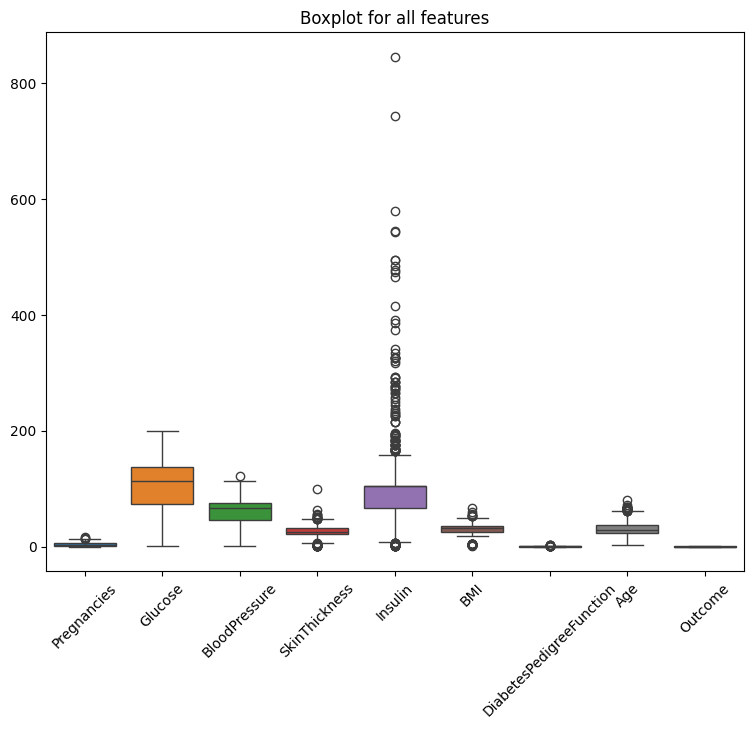

In [ ]:
#Membuat plot untuk visualisasi outlier
import matplotlib.pyplot as plt #membuat visualisasi grafik
import seaborn as sns #antarmuka yang lebih menarik

plt.figure(figsize=(9,7)) #lebar 9 tinggi 7
sns.boxplot(data=df1) #q1, q2, q3
plt.title('Boxplot for all features')
plt.xticks(rotation=45) #Mengatur rotasi label pada sumbu x sebesar 45 derajat agar lebih mudah dibaca
plt.show()

Cara atasi outlier: Deleting Row(menghapus baris),
Menghapus Outlier, Transformasi Data, Winsorizing (Mengganti
Outlier dengan Batasan), dll.

In [ ]:
#Mencari outlier di setiap kolom
glucose_indices, glucose_values = find_outliers_tukey(df1['Glucose'])
print("Outliers in Glucose")
print(np.sort(glucose_values))

print("\nOutliers for Pregnancies")
pr_indices, pr_values = find_outliers_tukey(df1['Pregnancies'])
print(np.sort(pr_values))

print("\nOutliers for BloodPressure")
bp_indices, bp_values = find_outliers_tukey(df1['BloodPressure'])
print(np.sort(bp_values))

print("\nOutliers for SkinThickness")
st_indices, st_value = find_outliers_tukey(df1['SkinThickness'])
print(np.sort(st_value))

print("\nOutliers for Insulin")
in_indicies, in_values = find_outliers_tukey(df1['Insulin'])
print(np.sort(in_values))

print("\nOutlier for BMI")
bmi_indices, bmi_values = find_outliers_tukey(df1['BMI'])
print(np.sort(bmi_values))

print("\nOutlier for DiabetesPedigreeFunction")
dpf_indicies, dpf_values = find_outliers_tukey(df1['DiabetesPedigreeFunction'])
print(np.sort(dpf_values))

print("\nOutlier for Age")
age_indicies, age_values = find_outliers_tukey(df1['Age'])
print(np.sort(age_values))

Outliers in Glucose
[]

Outliers for Pregnancies
[14. 14. 15. 17.]

Outliers for BloodPressure
[122.]

Outliers for SkinThickness
[ 1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  6. 48. 48. 48. 48. 49. 49. 49.
 51. 52. 52. 54. 54. 56. 63. 99.]

Outliers for Insulin
[  1.   1.   1.   1.   1.   1.   1.   2.   2.   2.   2.   3.   4.   4.
   5.   5.   5.   6.   6.   6.   7.   7.   7. 165. 165. 165. 165. 166.
 167. 167. 168. 168. 168. 168. 171. 175. 175. 175. 176. 176. 176. 178.
 182. 182. 182. 183. 184. 185. 185. 188. 191. 192. 192. 193. 194. 194.
 194. 196. 215. 215. 215. 225. 225. 228. 231. 231. 235. 237. 245. 249.
 255. 258. 265. 265. 271. 272. 274. 275. 277. 278. 284. 285. 285. 291.
 293. 293. 318. 321. 325. 325. 325. 326. 328. 335. 342. 375. 387. 392.
 415. 465. 474. 478. 485.

In [ ]:
#Menangani oulier dengan menghapus baris(deleting row)
#menghapus oulier di bp_indices(Outliers for BloodPressure)

df_del = df1.drop(bp_indices)
print(df_del.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000  105.659898  33.6   
1          1.0     85.0           66.0      29.000000  105.659898  26.6   
2          8.0    183.0           64.0      25.876155  105.659898  23.3   
3          1.0     89.0           66.0      23.000000   94.000000  28.1   
4          0.0    137.0            4.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
#menangani outlier pada kolom insulin dgn nilai max 321
min_in = np.min(df_del['Insulin'])
# if nilai insu > 321 maka diganti dgn min_in, kalo tida tetap saja
df_del['Insulin'] = np.where(df_del['Insulin'] > 321, min_in, df_del['Insulin'])
print(df_del.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0          6.0    148.0      72.000000      35.000000  105.659898  33.600000   
1          1.0     85.0      66.000000      29.000000  105.659898  26.600000   
2          8.0    183.0      64.000000      25.876155  105.659898  23.300000   
3          1.0     89.0      66.000000      23.000000   94.000000  28.100000   
4          0.0    137.0       4.000000      35.000000  168.000000  43.100000   
5          5.0    116.0      74.000000      25.876155  105.659898  25.600000   
6          3.0     78.0       5.000000      32.000000   88.000000  31.000000   
7         10.0    115.0      55.706685      25.876155  105.659898  35.300000   
8          2.0    197.0       7.000000      45.000000    1.000000   3.500000   
9          8.0    125.0      96.000000      25.876155  105.659898  29.865654   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  

In [ ]:
#menyimpan data yang telah dihilangkan oulier

df_del.to_csv('diabetes_preprocessed.csv', index=False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


## Heatmap

In [ ]:
#import data
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

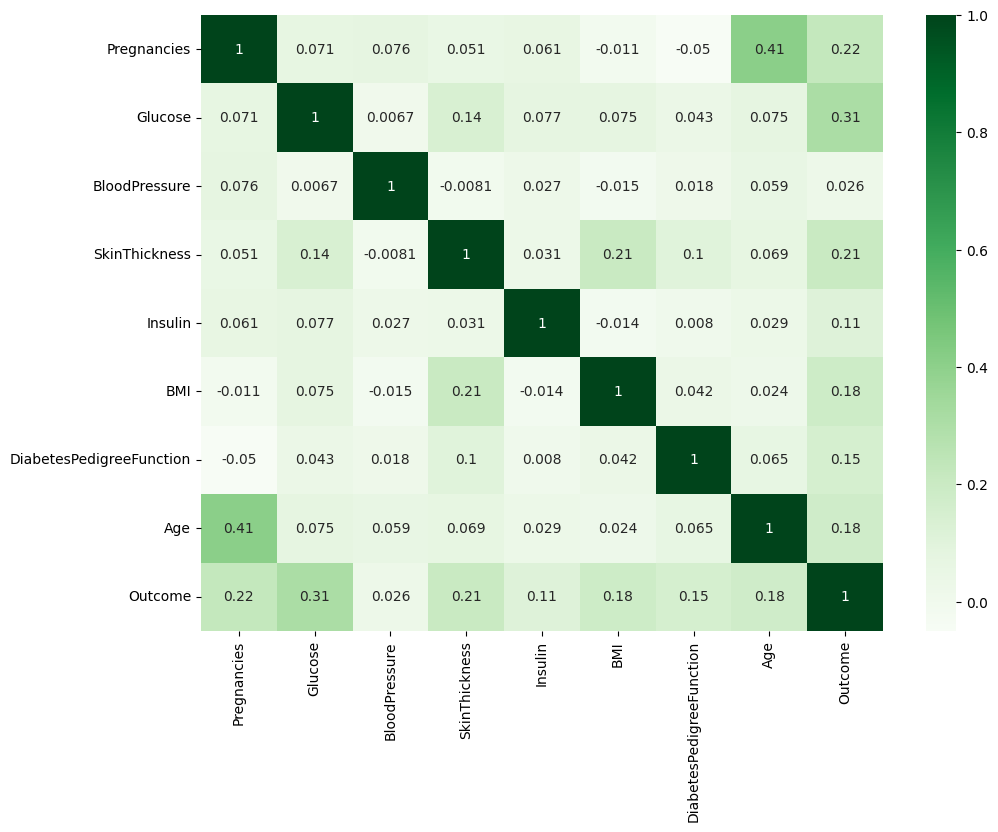

In [ ]:
df = pd.DataFrame(df_del)
df = df.iloc[:].copy() #buat salinan seluruh data frame
corr = df.corr() #hitung matirx korelasi
plt.figure(figsize=(11,8)) #leabr 11, tinggi 8
sns.heatmap(corr, cmap="Greens", annot=True) #True untuk show value corr
plt.show()

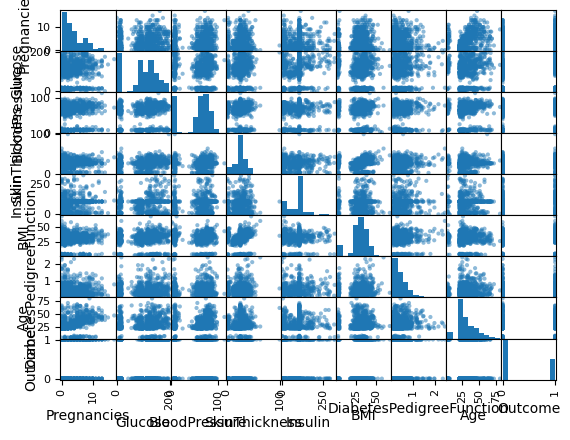

<Figure size 10000x10000 with 0 Axes>

In [ ]:
# Visualisasi evaluasi korelasi
from pandas.plotting import scatter_matrix

scatter_matrix(df_del) #membuat plot scatter untuk setiap kombinasi pasangan kolom
plt.figure(figsize=(100, 100)) #15,15 atau 20,20
plt.show()

#Scatter plots showing the similarity from –1 to 1

In [ ]:
plt.show(['Glucose', 'Age'])
plt.show()